In [1]:
import tensorflow as tf
import numpy as np

In [2]:
import matplotlib.pyplot as plt
sess = tf.Session()

In [3]:
from sklearn import datasets

from tensorflow.python.framework import ops
ops.reset_default_graph()

iris = datasets.load_iris()
x_vals = np.array([x[0:3] for x in iris.data])
y_vals = np.array([x[3] for x in iris.data])
sess = tf.Session()

In [4]:
train_indices = np.random.choice(len(x_vals), round(len(x_vals)*0.8), replace=False)

test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))

x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]

In [5]:
#Converting data in range of 0 - 1
def normalize_cols(m):
    col_max = m.max(axis=0)
    col_min = m.min(axis=0)
    return (m-col_min) / (col_max - col_min)

x_vals_train = np.nan_to_num(normalize_cols(x_vals_train))
x_vals_test = np.nan_to_num(normalize_cols(x_vals_test))

In [6]:
batch_size = 50
x_data = tf.placeholder(shape=[None, 3], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

In [7]:
hidden_layer_nodes1 = 5
hidden_layer_nodes2 = 3
A1 = tf.Variable(tf.random_normal(shape=[3,hidden_layer_nodes1]))
b1 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes1]))
A2 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes1,hidden_layer_nodes2]))
b2 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes2]))
A3 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes2,1]))
b3 = tf.Variable(tf.random_normal(shape=[1]))

In [8]:
hidden_output1 = tf.nn.relu(tf.add(tf.matmul(x_data, A1), b1))
hidden_output2 = tf.nn.relu(tf.add(tf.matmul(hidden_output1, A2), b2))
final_output = tf.nn.relu(tf.add(tf.matmul(hidden_output2, A3),b3))

In [9]:
loss = tf.reduce_mean(tf.square(y_target - final_output))

In [10]:
my_opt = tf.train.GradientDescentOptimizer(0.01)
#my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step = my_opt.minimize(loss)
init = tf.initialize_all_variables()
sess.run(init)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [11]:
loss_vec = []
test_loss = []
for i in range(50):
    # First we select a random set of indices for the batch.
    rand_index = np.random.choice(len(x_vals_train), size=batch_size)
    # We then select the training values
    rand_x = x_vals_train[rand_index]
    rand_y = np.transpose([y_vals_train[rand_index]])
    # Now we run the training step
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    # We save the training loss
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(np.sqrt(temp_loss))

    # Finally, we run the test-set loss and save it.
    test_temp_loss = sess.run(loss, feed_dict={x_data: x_vals_test, y_target: np.transpose([y_vals_test])})
    test_loss.append(np.sqrt(test_temp_loss))
    if (i+1)%5==0:
        print('Generation: ' + str(i+1) + '. Loss = ' + str(temp_loss))

Generation: 5. Loss = 2.2438
Generation: 10. Loss = 1.96274
Generation: 15. Loss = 2.153
Generation: 20. Loss = 1.78105
Generation: 25. Loss = 2.02988
Generation: 30. Loss = 2.46862
Generation: 35. Loss = 1.90958
Generation: 40. Loss = 1.9816
Generation: 45. Loss = 1.70727
Generation: 50. Loss = 2.1126


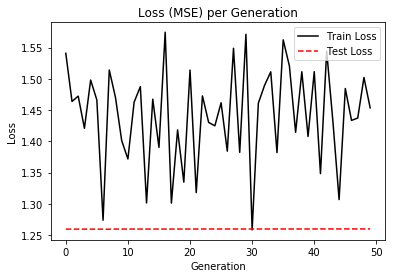

In [12]:
plt.plot(loss_vec, 'k-', label='Train Loss')
plt.plot(test_loss, 'r--', label='Test Loss')
plt.title('Loss (MSE) per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()